<a href="https://colab.research.google.com/github/sayaniketsaini24/Statistics-Project-On-Hypothesis-Testing/blob/main/Statistics_Project_On_Hypothesis_Testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis**

> Problem Statement:

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

> Objective:

The objective of this project is to analyse various payments
methods accepted by the NYC Taxi drivers and provide an
optimized solution to increase there revenue by payment type.

> Research Question:

**Is there a relationship between total fare amount and payment type?**

Can we nudge customers toward payment methods that generate higher revenue for drivers, wihthout negatively impacting customer experience?

> Data Overview:

For this analysis, we utilized the comprehensive dataset of NYC Taxi Trip Record, performed data clenaing and feature engineering procedures to concentrate solely on the relevant columns essential for our investigation.

>Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

> Loading the Dataset:

In [ ]:
df = pd.read_csv("/content/yellow_tripdata_2020-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


> Exploratory Data Analysis:

In [ ]:
df.shape

(6405008, 18)

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


**Features impacting Fare Amount:**
* Trip distance
* Trip Duration
* Pickup and Drop Location

In [ ]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [ ]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


**Finding the duration of the trip in minutes:**

In [ ]:
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["duration"] = df["duration"].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


**Filtering the Data --- Using only required Features:**

In [ ]:
df = df[["passenger_count", "payment_type", "fare_amount", "trip_distance", "duration"]]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


**Handling Missing Values:**

In [ ]:
df.isnull().sum()

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [ ]:
print("Percentage of Missing Values in the Dataset is", 65441/len(df)*100)

Percentage of Missing Values in the Dataset is 1.021716132126611


In [ ]:
df.dropna(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [ ]:
df["passenger_count"] = df["passenger_count"].astype("int64")
df["payment_type"] = df["payment_type"].astype("int64")

In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


**Duplicates doesn't have any impact on data, so duplicates must be droped.**

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(3007861, 5)

In [ ]:
df["passenger_count"].value_counts(normalize = True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [ ]:
df["payment_type"].value_counts(normalize = True)

,proportion
payment_type,
1,6.782670e-01
2,3.075731e-01
3,8.721480e-03
4,5.438084e-03
5,3.324622e-07


In [ ]:
df = df[df["payment_type"]<3]
df = df[(df["passenger_count"]>0) & (df["passenger_count"]<6)]
df.shape

(2780283, 5)

In [ ]:
df["payment_type"].replace([1,2], ["Online", "Cash"], inplace = True)
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Online,6.0,1.2,4.800000
1,1,Online,7.0,1.2,7.416667
2,1,Online,6.0,0.6,6.183333
3,1,Online,5.5,0.8,4.850000
4,1,Cash,3.5,0.0,2.300000


In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


**Detection and Handling Outliers:**

In [ ]:
df = df[df["fare_amount"]>0]
df = df[df["trip_distance"]>0]
df = df[df["duration"]>0]

In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


<Axes: >

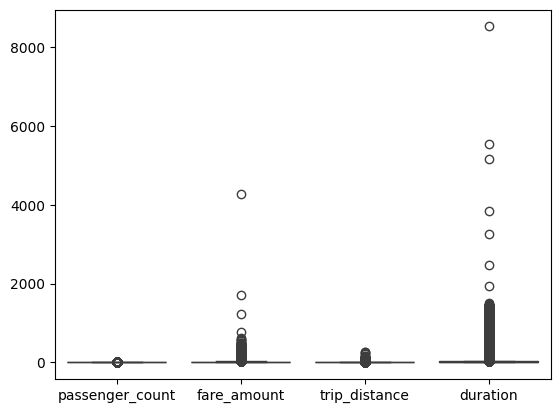

In [ ]:
sns.boxplot(data = df)

In [ ]:
for col in ["fare_amount",	"trip_distance",	"duration"]:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  ll = q1 - 1.5 * iqr
  ul = q3 + 1.5 * iqr

  df[col].clip(lower = ll, upper = ul, inplace = True)

<Axes: >

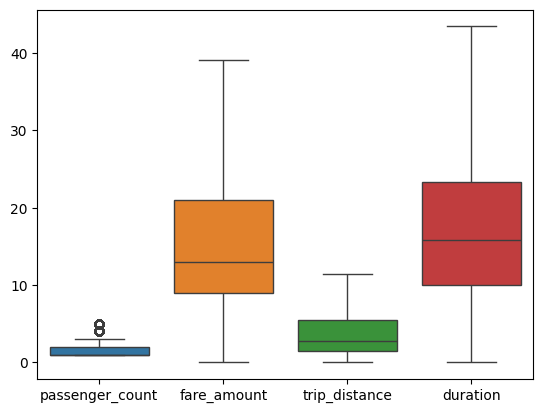

In [ ]:
sns.boxplot(data = df)

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Online,6.0,1.20,4.800000
1,1,Online,7.0,1.20,7.416667
2,1,Online,6.0,0.60,6.183333
3,1,Online,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Online,10.5,2.40,12.383333
6339555,3,Online,10.0,2.09,14.800000
6339561,1,Online,17.5,4.11,21.500000
6339563,1,Online,13.0,2.13,19.000000


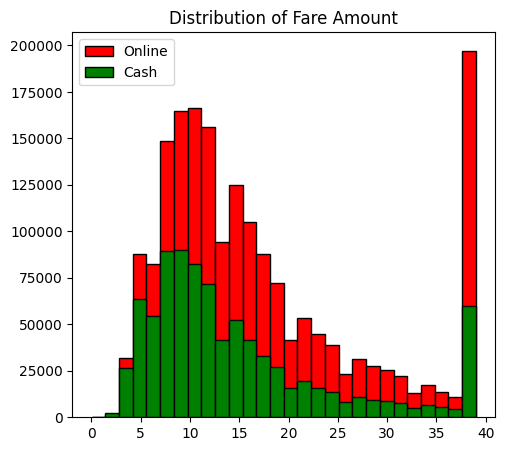

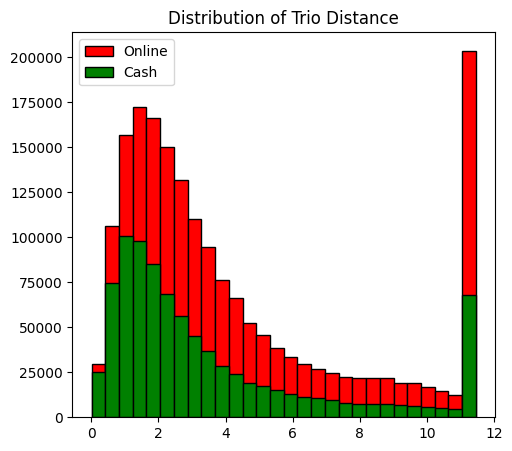

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df["payment_type"] == "Online"]["fare_amount"], histtype = 'barstacked', bins = 28, edgecolor = "k", color = "red", label = "Online")
plt.hist(df[df["payment_type"] == 'Cash']["fare_amount"], histtype = 'barstacked', bins = 28, edgecolor = "k", color = "green", label = 'Cash')
plt.legend()


plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Trio Distance')
plt.hist(df[df["payment_type"] == "Online"]["trip_distance"], histtype = 'barstacked', bins = 28, edgecolor = "k", color = "red", label = "Online")
plt.hist(df[df["payment_type"] == 'Cash']["trip_distance"], histtype = 'barstacked', bins = 28, edgecolor = "k", color = "green", label = 'Cash')
plt.legend()

plt.show()

In [ ]:
df.groupby("payment_type").agg({"fare_amount" : ["mean", "std"], "trip_distance" : ["mean", "std"]})

fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
Cash           14.763461   9.616207      3.581880  3.227073
Online         17.091852  10.324506      4.261378  3.437482

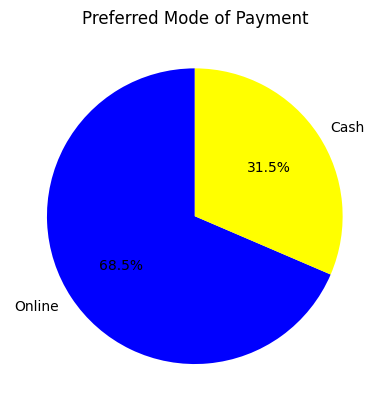

In [ ]:
plt.title('Preferred Mode of Payment')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, autopct = "%1.1f%%", colors = ['blue', 'yellow'])
plt.show()

* **67.3%** of the passenger prefer online mode for payments and **32.7%** of the passengers pay by cash.
* Most of the customers are prefering online payments over cash transactions.

**Distribution of Payment Type:**

In [ ]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [ ]:
passenger_count['perc'] = passenger_count['count']/passenger_count['count'].sum()*100
passenger_count

,payment_type,passenger_count,count,perc
0,Cash,1,539469,19.624676
1,Cash,2,177050,6.440683
2,Cash,3,60288,2.193143
3,Cash,4,36000,1.309600
4,Cash,5,51822,1.885168
5,Online,1,1155177,42.022756
6,Online,2,385532,14.024792
7,Online,3,136626,4.970148
8,Online,4,70442,2.562522
9,Online,5,136526,4.966511


In [ ]:
df1 = pd.DataFrame(columns = ['payment_type', 1, 2, 3, 4, 5])
df1['payment_type'] = ['Cash', 'Online']
df1.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Cash,19.624676,6.440683,2.193143,1.3096,1.885168
1,Online,42.022756,14.024792,4.970148,2.562522,4.966511


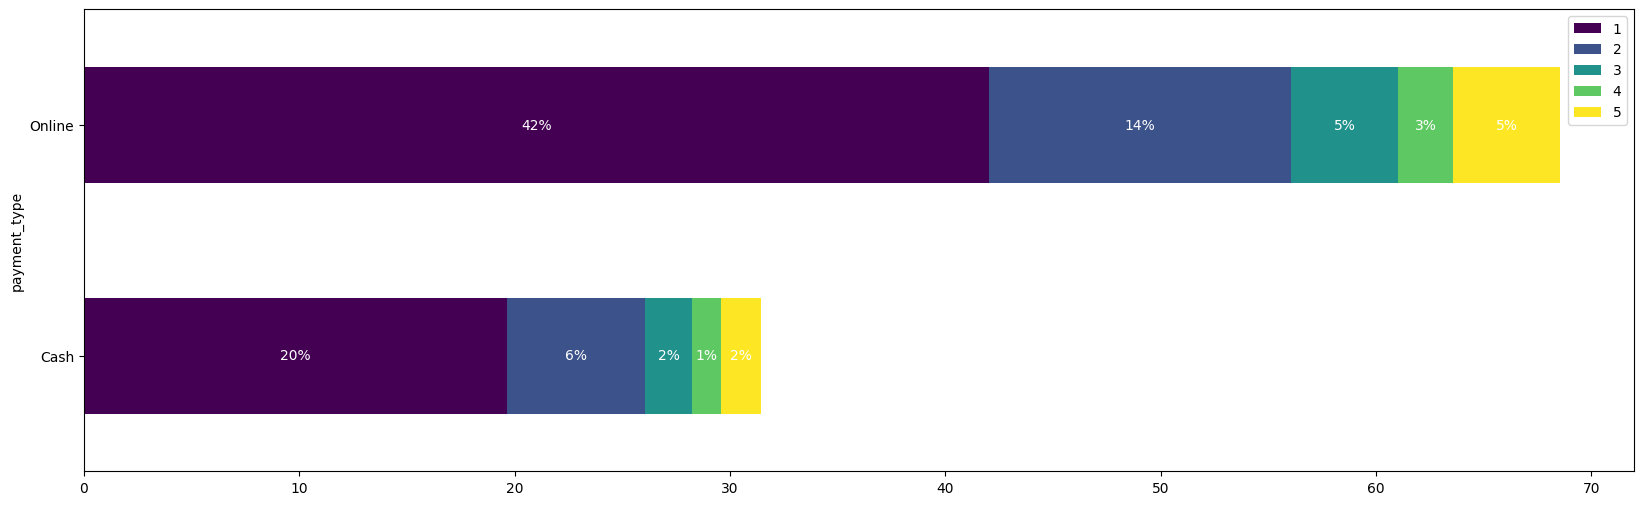

In [ ]:
fig,ax = plt.subplots(figsize = (20, 6))

df1.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, colormap = 'viridis')
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.text(x + width/2,
          y + height/2,
          '{:.0f}%'.format(width), color = 'white',
          horizontalalignment = 'center',
          verticalalignment = 'center')

> Passenger Count Analysis:

* Among card payments, rides with single passenger dominates with largest portion comprising of **42%** of all online transactions.
* Similarly, cash transactions are also predominantly dominated by single -ride passengers making upto **20%** of all cash payments.
* There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that as the no.of passengers/ group increases the usage of taxis are less or opting for alternative payment methods.
* These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behavior and preferences.

> Hypothesis Testing:

* **Null Hypothesis(Ho) :-** There is no significant difference in average fare between customers who use online payments and cash.
* **Alternative Hypothesis(H1):-** There is significant difference in average fare between customers who use online payments and cash.

**Checking the Normality of data --- QQ Plot:**

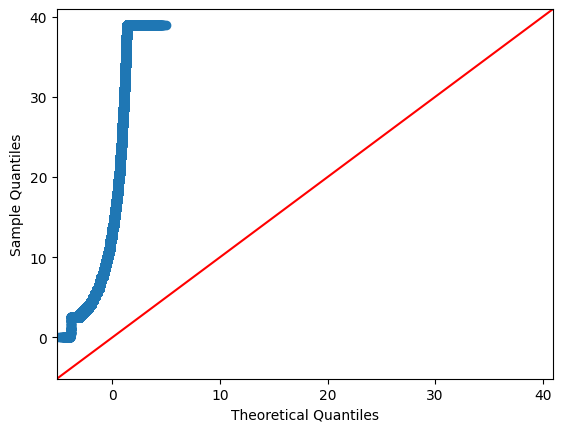

In [ ]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

* Hence, the data is not normal and standard deviation is unknown we use T-Test.

In [ ]:
online_sample = df[df['payment_type'] == 'Online']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [ ]:
t_stats, p_value = st.ttest_ind(a = online_sample,
                                b = cash_sample,
                                equal_var = False)

level_of_significance = 0.05 #Error
if p_value <= level_of_significance:
  print('We reject Ho')
  print('Hence, it is proved. There is significant difference in average fare between customers who use online payments and cash.')
else:
  print('We do not reject Ho')

print('T statistics', t_stats)
print('P-value', p_value)

We reject Ho
Hence, it is proved. There is significant difference in average fare between customers who use online payments and cash.
T statistics 182.0837116780057
P-value 0.0


> Recommendations:

* Encourage customers to use online payments to capitalize on the potential for generating more revenue for taxi cab drivers.
* Implement strategies such coupons or discounts on transaction or other benfits to increase more customer base and choose online payment methods.
* Provide seamless and secure gateways for online payments to ensure customer safety and convience.